In [130]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
irisd=load_iris()

### 데이터 클래스 정보
* 'data': 데이터
* 'target' : 라벨
* 'target_names': 라벨 컬럼
* 'feature_names': 데이터 컬럼
* 'DESCR': 설명
* 

In [132]:
irisd['target']
# 타켓이 정렬되어 있다 => 데이터가 독립적이지 않다 => 데이터를 학습시 섞어야 한다
# 데이터셋 구분(train,test)이 없으니 데이터셋 구분시에 셔플이 필요

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [133]:
print(irisd['target_names'],irisd['target'].shape)

['setosa' 'versicolor' 'virginica'] (150,)


In [134]:
irisd['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [135]:
irisdf=pd.DataFrame(data=irisd['data'],columns=irisd['feature_names'])
irisdf['target']=irisd['target']
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 기초통계분석
* describe 결과 :
    - 평균 분산에서 유의한 차이가 있을것으로 예상된다.
    - 사분위수 만으로 형태 파악 어려워 시각화

In [136]:
irisdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 기초 시각화
* 히스토그램
* 전체적 데이터 분포 확인

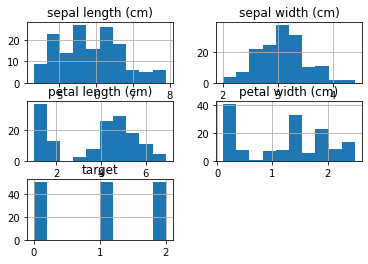

In [137]:
irisdf.hist()
plt.show()

### 기초 통계 시각화
* 박스플롯
- 극단치 왜도 첨도 분포 등으로 통해 유의한 차이가 있는지 분석

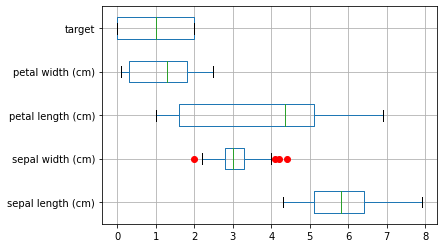

In [138]:
irisdf.boxplot( vert=0,sym="ro")
plt.show()

### 상대분석
* 상대적 영향력이나 선형성 분석을 위한 시각화
* 시각적 직관을 통해서 추후 분석및 학습 방향을 예상


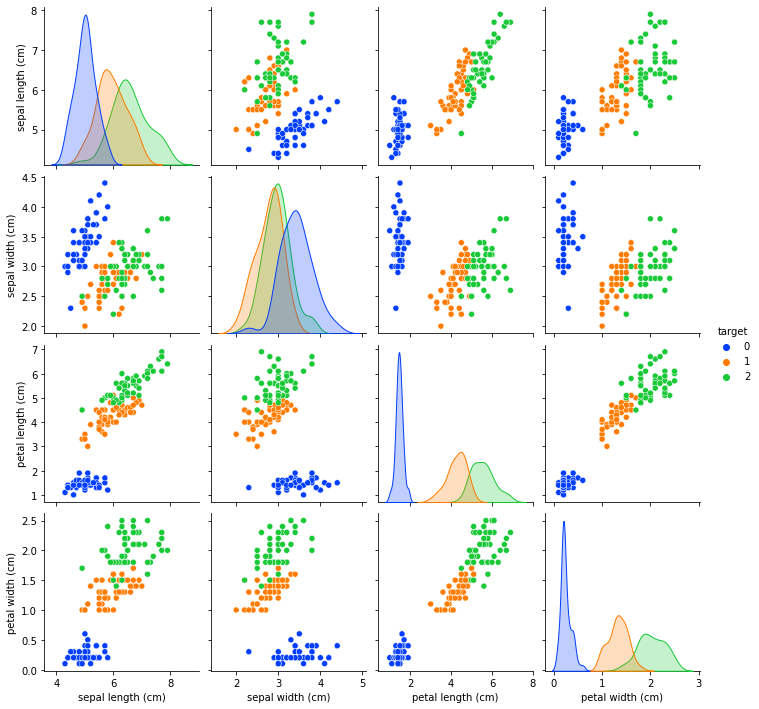

In [139]:
irisf=irisdf[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
sns.pairplot(irisdf,hue='target',palette='bright')
plt.show()

### 목표: sepal petal의 폭과 길이를 통해 품종을 구별하는 모델을 구축
- 과정
    * DT등을 사용하여 분류 모델을 학습
    * DL을 통해서 분류 모델 학습
- 머신러닝 준비
    * 데이터 정제: 동일 데이터 타입, 동일 조건
    * 타겟 라벨링: 분류모델의 경우 one-hot 인코딩
    * one-hot encoding: 명확한 분류를 위해 타겟(라벨)을 배열로 표시
        - 이유: 머신러닝 입장에서도 확률기반의 판단
        - 확률기반 판단: 각 라벨로 보여질 수 있는 확률을 계산
        - ML 의 답: [0.15,0.25,0.6,0.1]
        - 사용자가 원하는 답: [0,0,1,0]
    * 머신러닝의 평가를 위한 준비:
        - 자료를 test set 과 train set 으로 분리
        - test set 을 통해 모델을 검증
    * 학습모델 결정:
        - 피처특성:(컬럼 숫자, 타겟의 분류 숫자)
            * 작음: ML/통계
            * 크다: DL
        - 데이터셋의 크기
            * 작다: ML 을 사용
            * 크다: DL 가능
        - 사전 통계 검증
            * 뚜렷한 분류 가능: ML
            * 모호한 분류: DL
      

In [140]:
# ML DT모델 준비
from sklearn.tree import DecisionTreeClassifier
# ML train set 준비
from sklearn.model_selection import train_test_split

### train_test_split
* train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
- (1) Parameter
    * arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)->X,Y를 넣어야 test_x,train_x,test_y,train_y 로 나옴
    * test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
    * train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
    * random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력) 기본적으로 숫자로 지정=> 여러모델 테스트시 일정한 값 유지
    * shuffle : 셔플여부설정 (default = True)-> RNN은 false
    * stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.
    * https://blog.naver.com/PostView.nhn?blogId=siniphia&logNo=221396370872&parentCategoryNo=&categoryNo=22&viewDate=&isShowPopularPosts=true&from=search

In [141]:
X_train,x_test,Y_train,y_test=train_test_split(irisd['data'],irisd['target'])

In [142]:
y_test

array([1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0])

In [143]:
X_train,x_test,Y_train,y_test=train_test_split(irisd['data'],irisd['target'],random_state=1)

In [144]:
# 시드 고정을 통해 일정한 형태의 데이터 확보
Y_train

array([1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0,
       0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 0])

### DT(DecisionTreeClassifier)
* 특징
    - 데이터에 규칙 기반 학습
    - 자동으로 규칙의 트리 생성을 통한 분류 규칙을 만드는 알고리즘(if,else)
* 장점
    - 쉽고 직관적입니다.
    - 각 피처의 스케일링과 정규화 같은 전처리 작업의 영향도가 크지 않다
* 단점
    - 규칙을 추가하며 서브트리를 만들어 나갈수록 모델이 복잡해짐 
    - 과적합에 빠지기 쉬움
    - 트리의 크기를 사전에 제한하는 튜닝이 필요
---    
* 파라미터
    - min_samples_split	
        - 노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어하는데 사용
        - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
    - min_samples_leaf	- 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
    - min_samples_split과 함께 과적합 제어 용도
        - 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요
    - max_features	- 최적의 분할을 위해 고려할 최대 feature 개수
        - Default = None → 데이터 세트의 모든 피처를 사용
        - int형으로 지정 →피처 갯수 / float형으로 지정 →비중
        - sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정
        - log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정

    - max_depth	
        - 트리의 최대 깊이: 자주쓰임
        - default = None
            → 완벽하게 클래스 값이 결정될 때 까지 분할
            - 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
            - 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
    - max_leaf_nodes
        -리프노드의 최대 개수

###  ML
* 머신러닝 모델 결정: DT
* 모델 학습: fit ( train 데이터 활용)
* 모델 테스트: test 데이터의 predict(예상)을 통한 검증

In [234]:
# 학습하기
dtc=DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [235]:
#테스트 예측
pred=dtc.predict(x_test)

In [236]:
from sklearn.metrics import accuracy_score
testp=accuracy_score(y_test,pred)
print("DT활용한 정확도:",testp)


DT활용한 정확도: 0.9736842105263158


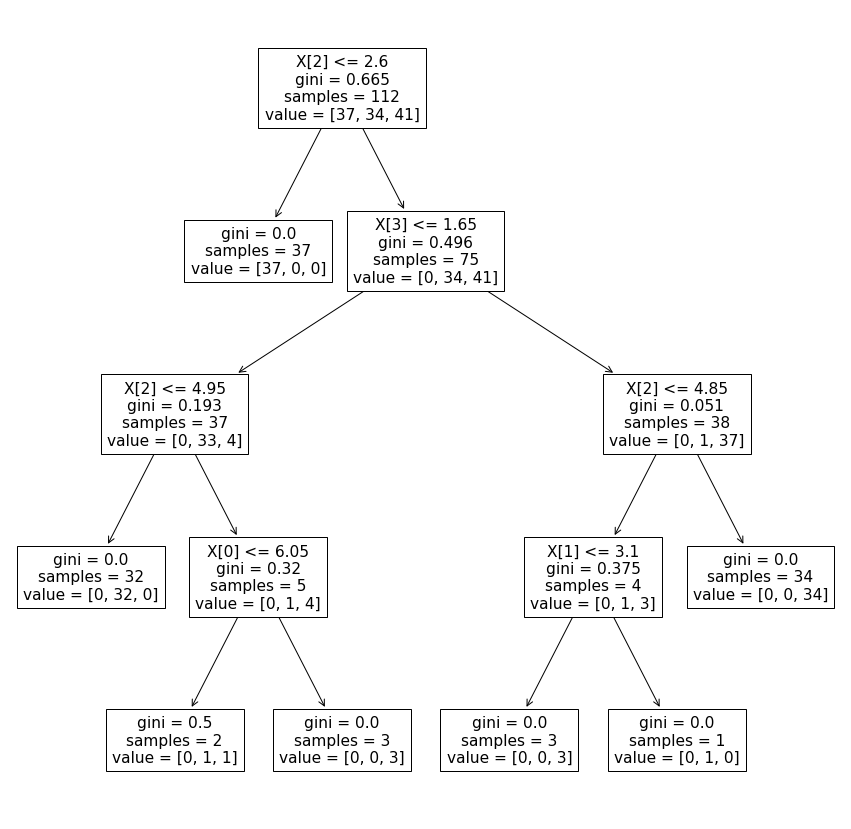

In [237]:
# tree graph 를 통한 직관적 이해
from sklearn.tree import plot_tree
fig,ax=plt.subplots(figsize=(15,15))
plot_tree(dtc)
plt.show()

### export_graphviz
* model: train 한 모델
* out_file: dot 파일 출력 명
* class_names: 타겟이름
* feature_names: 특성이름
* impurity: 지니계수 여부
* filled: 색칠여부

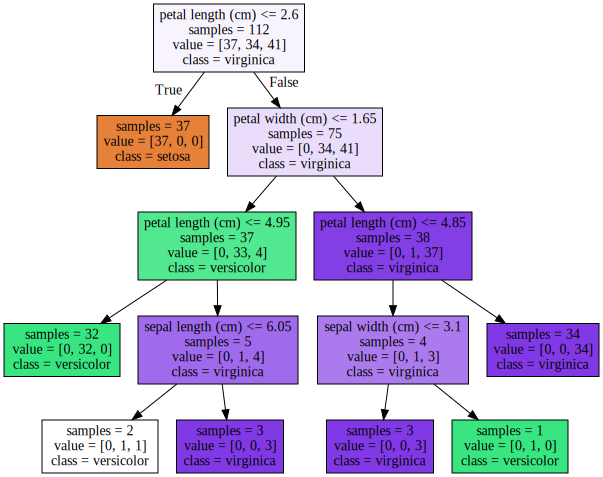

In [238]:
import graphviz
from sklearn.tree import export_graphviz
fname='tree.dot'
export_graphviz(dtc,out_file=fname,class_names=irisd['target_names'],
                feature_names=irisd['feature_names'],
               impurity=False,
               filled=True)

with open(fname) as f:
    dgraph=f.read()
dot=graphviz.Source(dgraph)
dot


In [239]:
irisd.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [240]:
fimp=dtc.feature_importances_
fimp

array([0.00816922, 0.02042305, 0.58894081, 0.38246693])

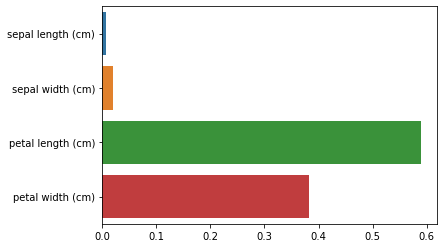

In [243]:
sns.barplot(y=irisd.feature_names,x=fimp)

plt.show()

### 과적합 Overfitting
* make_classification : 분류모델 생성기 
    - n_samples : 표본 데이터의 수 (default=100)
    - n_features : 독립 변수의 수(전체 피처의 수) (default=20)
    - n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수 (default=2)
    - n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수 (default=2)
    - n_repeated : 독립 변수 중 단순 중복된 성분의 수 (default=0)
    - n_classes : 종속 변수의 클래스 수 default=2)
    - n_clusters_per_class : 클래스 당 클러스터의 수 (default=2)
    - weights : 각 클래스에 할당된 표본 수 (default=None)
    - flip_y : 클래스가 임의로 교환되는 샘플의 일부, 라벨에 노이즈를 생성하여 분류를 어렵게 만든다(default=0.01)

In [201]:
from sklearn.datasets import make_classification
x_src,y_src=make_classification(n_features=2,
                                n_classes=3,
                                random_state=1,
                                n_redundant=0,
                                n_informative=2,
                                n_clusters_per_class=1
                               )
x_src

array([[ 0.90394545,  0.35413361],
       [-1.03106689, -1.05752257],
       [-0.84967187,  0.88838944],
       [-1.18068102,  1.18211008],
       [-0.64712399,  0.18317821],
       [-1.00367144,  1.26222698],
       [ 1.17456965,  0.69211449],
       [ 0.8780991 ,  0.89551051],
       [-0.88947682, -0.68996387],
       [-1.46662161,  0.87874071],
       [ 1.08480038,  1.64661853],
       [-0.06447351,  1.54574396],
       [-0.86803958, -0.58540373],
       [ 0.96435056,  1.77547698],
       [-1.23017555,  1.06523311],
       [ 0.82178321,  1.18947778],
       [-1.0514288 , -1.11545575],
       [-0.80103137, -0.6290332 ],
       [-0.64154842, -0.12321081],
       [ 0.89189141,  0.87699465],
       [-1.1654631 ,  0.93541282],
       [ 0.9317172 ,  0.78344054],
       [-1.18913787,  0.62368852],
       [-1.26335056, -1.87663405],
       [ 0.77151441,  0.345716  ],
       [-0.90731836,  1.06040861],
       [-1.20257258,  0.69174373],
       [-0.8804956 ,  1.07838382],
       [-0.8293235 ,

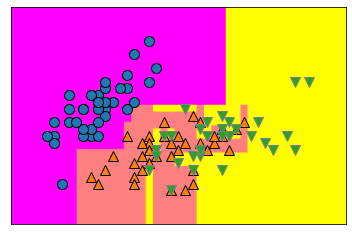

In [277]:
from mglearn.plots import plot_2d_classification
from mglearn import discrete_scatter
X_src=irisdf[['sepal length (cm)','sepal width (cm)']].values
X_src[:5]
Y_src=irisdf[['target']].values
Y_src[:5]
X_train2,x_test2,Y_train2,y_test2=train_test_split(X_src,Y_src)
dtc2=DecisionTreeClassifier()
dtc2.fit(X_train2,Y_train2)
yf2=np.ravel(Y_train2)
plot_2d_classification(dtc2,X_train2,eps=0.5, cm='spring')
discrete_scatter(X_train2[:,0],X_train2[:,1],yf2)
plt.show()